DECISION TREE

1.Data Preparation:

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("C:\\DataScience25\\official_assignments\\Decision Tree\\Decision Tree\\heart_disease.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


2.Exploratory Data Analysis (EDA):

In [7]:
df.shape

(908, 13)

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


Finding Statistical Summary of the Dataset:

In [12]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


Age:      
The average age is 53, ranging from 29 to 77.The distribution appears nearly normal or slightly right-skewed. The wide range indicates potential outliers.

trestbps(Resting Blood Pressure):   
The minimum value is 0, which is clinically invalid, indicating either missing data or entry error. The distribution is right-skewed, with a max value of 200, indicating outliers.

chol:       
Cholesterol values range from 0 to 603, with a mean of 201. A cholesterol value of 0 is not clinically valid, either missing data or entry error. The distribution appears left-skewed, and there are significant outliers.

thalch(Maximum Heart Rate Achieved):    
The differnce between min and max indicates the presence of outliers.The distribution is left skewed.

oldpeak:term smjha meko yehh bhii    
The distribution has a mean of 0.89 and a median of 0.5, indicating slight right skewness. The minimum value is negative, and the presence of outliers and wide spread is observed.

num:       
Is the target variable.

Visualizing using Histogram:

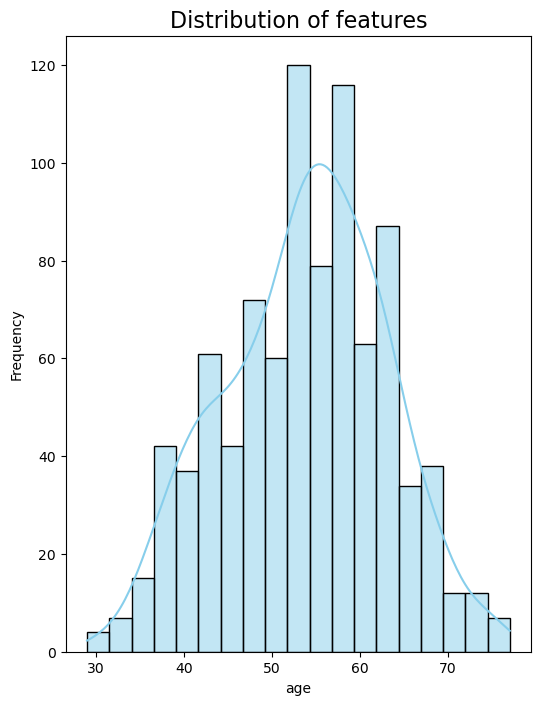

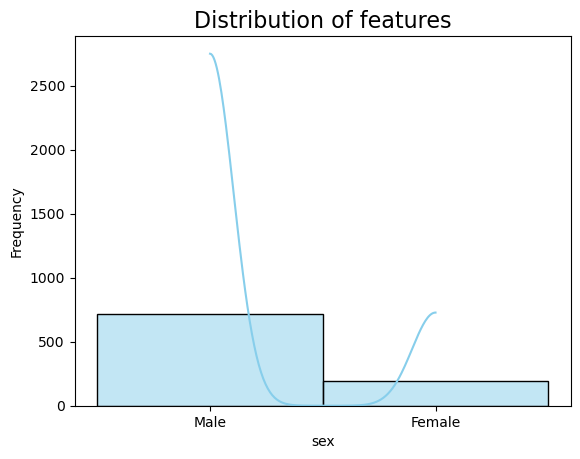

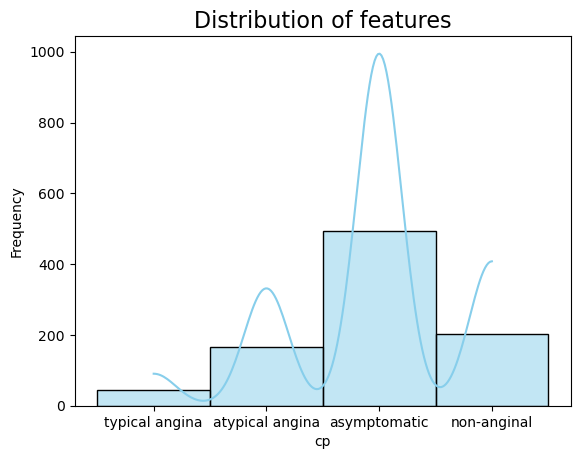

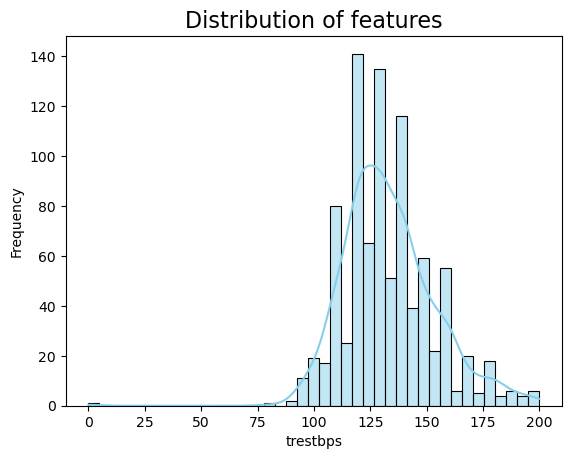

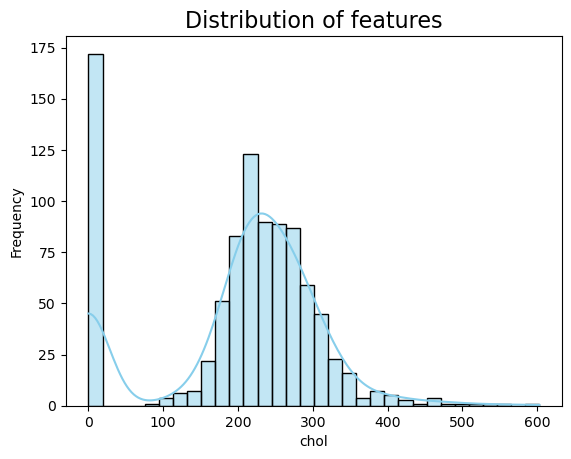

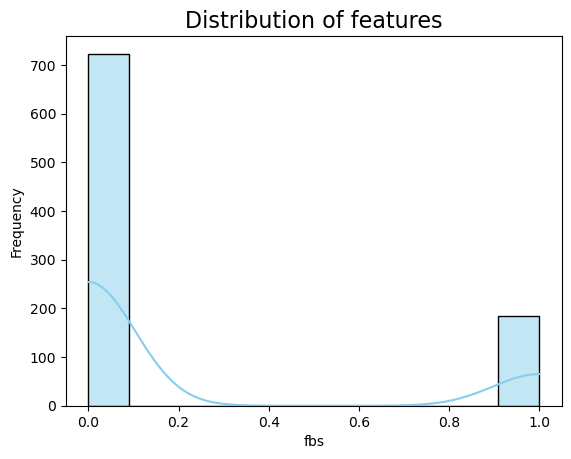

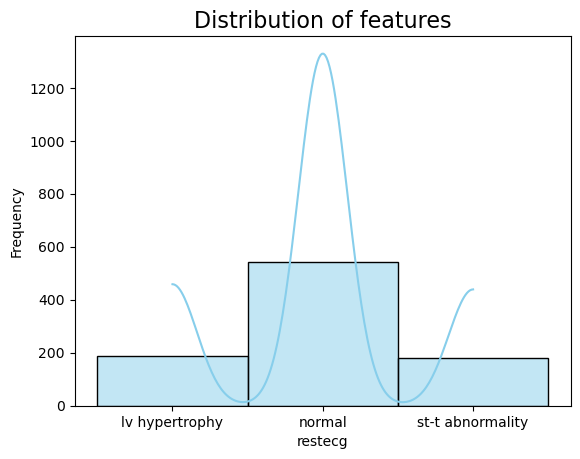

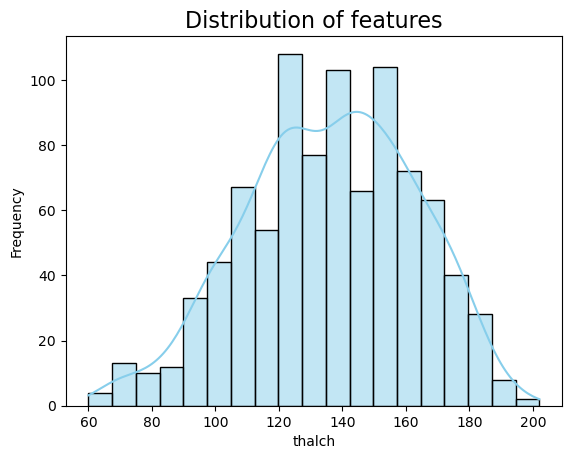

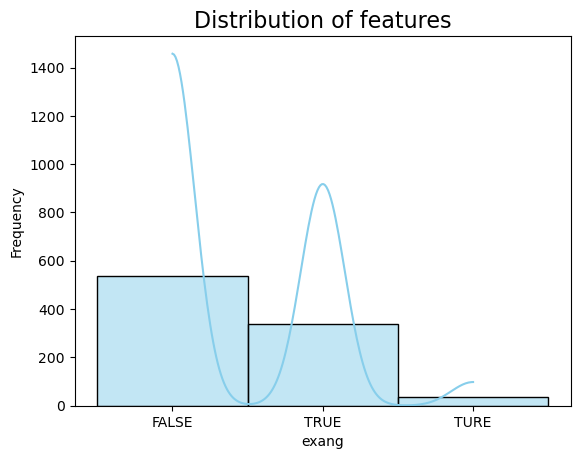

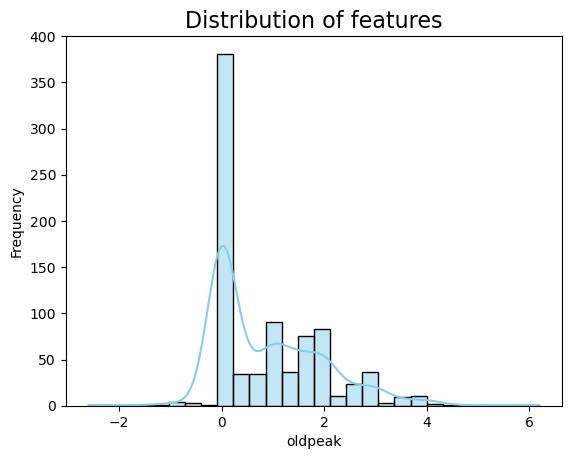

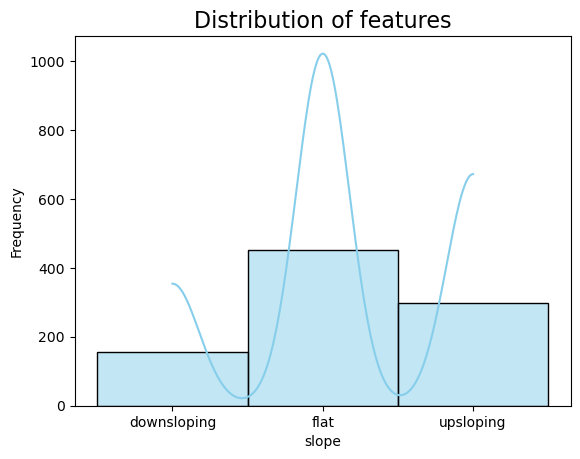

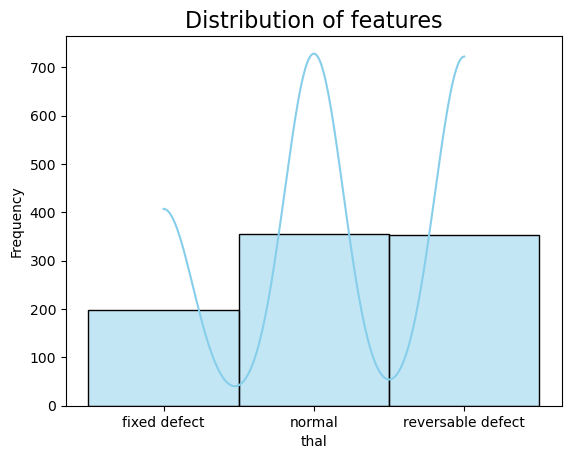

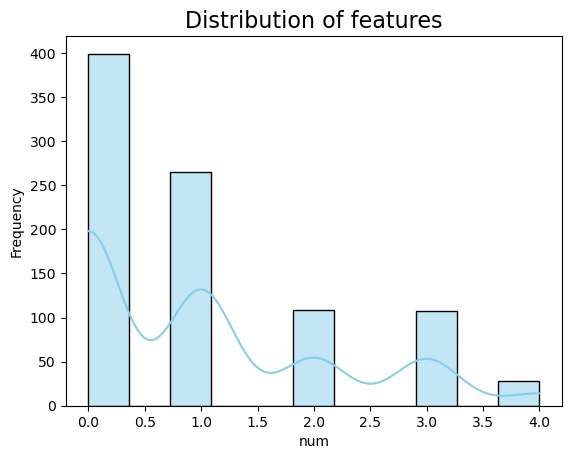

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,8))

for column in df.columns:
    sns.histplot(df[column],color='skyblue',edgecolor="black",kde=True)
    plt.title("Distribution of features",fontsize=16)
    plt.xlabel(f"{column}")
    plt.ylabel("Frequency")
    plt.show()

Age is symmetric with a peak around 50–60, suggesting a mid-aged population.       

trestbps is slightly right skewed and most values are between 100-150.

chol is left skewed distribution, majority around 200–300.

thalch is left skewed with most values between 100–160.



Visualizing using Box Plot:

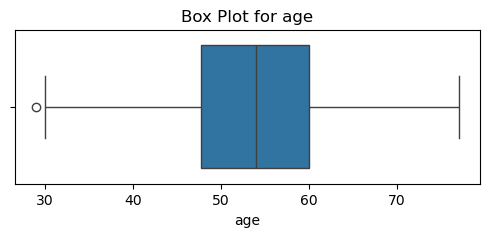

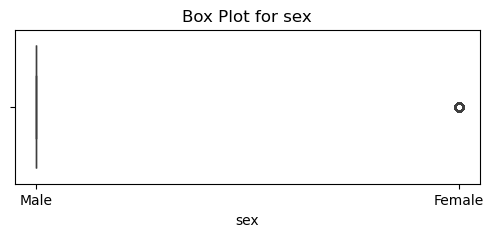

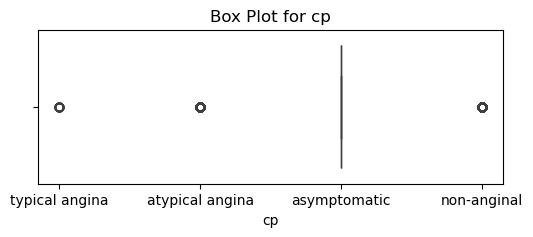

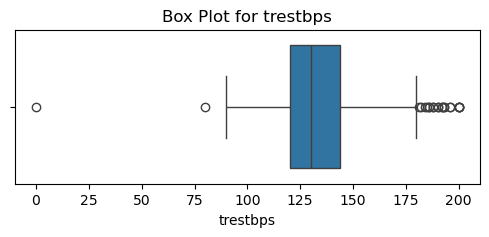

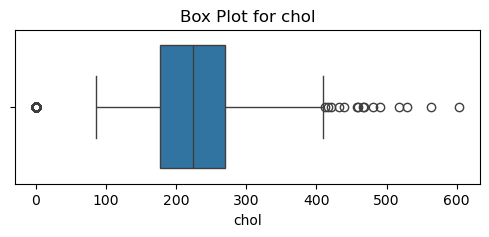

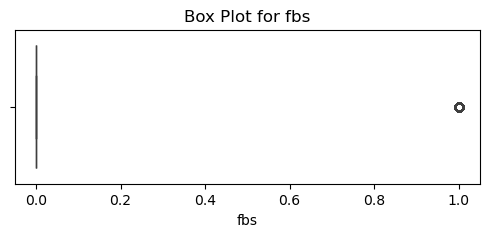

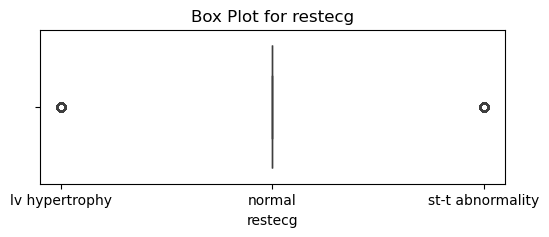

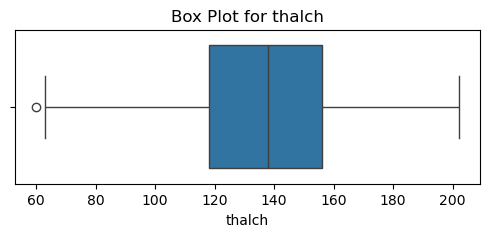

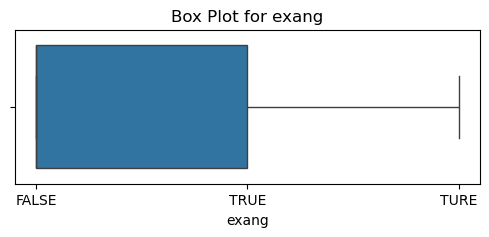

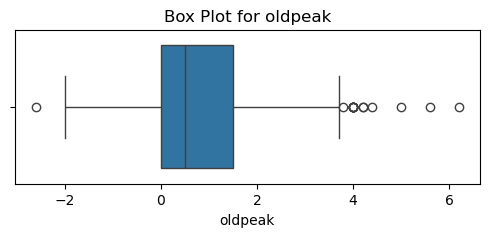

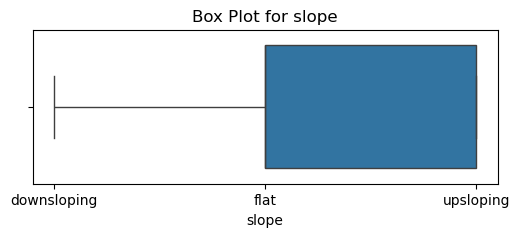

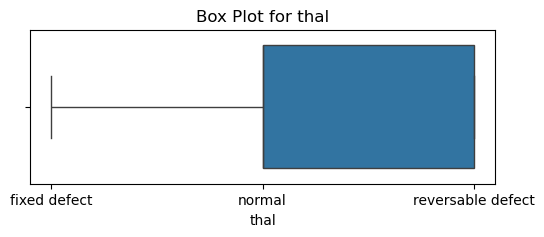

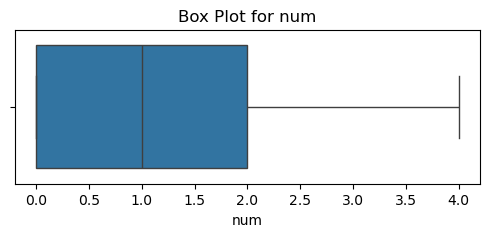

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for cols in df.columns:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[cols])
    plt.title(f"Box Plot for {cols}")
    plt.show()

trestbps shows outliers at both end.

chol shows multiple outliers above 400.



Visualizing using Heatmap:

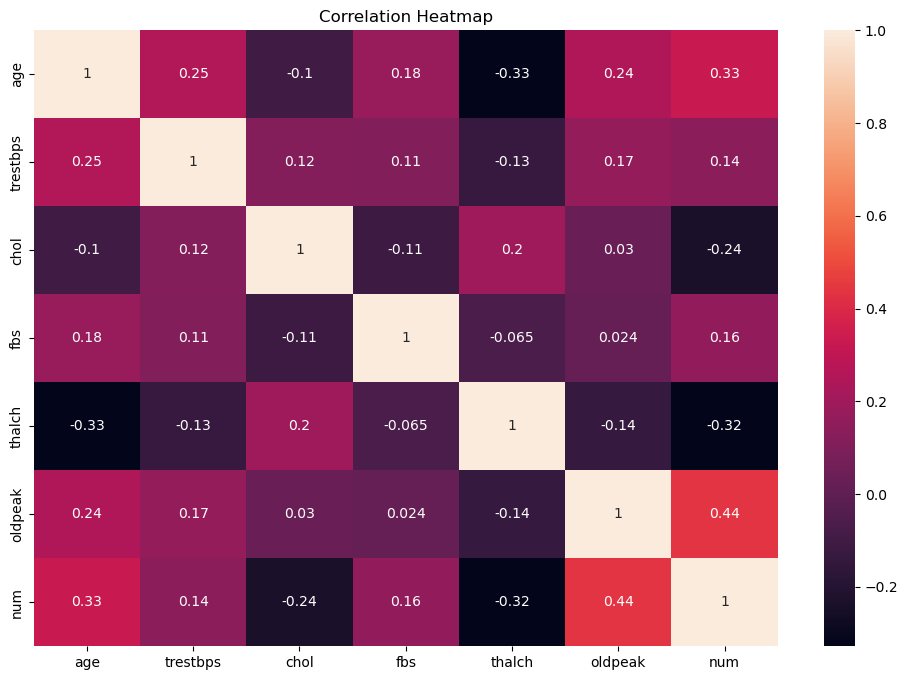

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

plt.title("Correlation Heatmap")
plt.show()

There is no extremely high correlation with feature.    
oldpeak and thatch shows a moderate negtaive correlation.    
The target variable num has a moderate positive correlation with oldpeak,weak positive correlation with age and a weak negative correlation with thalch.

3.Feature Engineering:

Handling Missing Values

In [25]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Encoding Categorical Variables

In [28]:
df.select_dtypes('object').columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Applying One Hot Encoding on Nominal Columns and Label Encoding on Ordinal Columns:

In [30]:
df_encoded=df.copy()

In [31]:
nominal_cols = ['sex', 'restecg', 'exang', 'thal']
df_encoded=pd.get_dummies(df_encoded,columns=nominal_cols,drop_first=True)

In [32]:
from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['cp', 'slope']
le=LabelEncoder()
for cols in ordinal_cols:
    df_encoded[cols]=le.fit_transform(df_encoded[cols])

In [33]:
df_encoded

,age,cp,trestbps,chol,fbs,thalch,oldpeak,slope,num,sex_Male,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,thal_normal,thal_reversable defect
0,63,3,145,233,True,150,2.3,0,0,True,False,False,False,False,False,False
1,41,1,135,203,False,132,0.0,1,0,True,True,False,False,False,False,False
2,57,0,140,192,False,148,0.4,1,0,True,True,False,False,False,False,False
3,52,3,118,186,False,190,0.0,1,0,True,False,False,False,False,False,False
4,57,0,110,201,False,126,1.5,1,0,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,125,0,False,120,1.5,2,4,True,True,False,False,False,True,False
904,62,0,166,170,False,120,3.0,1,4,True,False,True,True,False,True,False
905,56,2,170,0,False,123,2.5,0,4,True,False,False,True,False,False,True
906,56,2,144,208,True,105,0.5,0,4,True,False,True,False,True,True,False


4.Decision Tree Classification:

In [59]:
x=df_encoded.drop('num',axis=1)

In [61]:
y=df_encoded['num']

Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [54]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Implement a Decision Tree Classification model using a library like scikit-learn.

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_model=DecisionTreeClassifier()

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [76]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred=dt_model.predict(x_test)

In [113]:
y_pred_proba = dt_model.predict_proba(x_test)

In [131]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report

In [117]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.5384615384615384


In [119]:
print("Precision Score:",precision_score(y_test,y_pred,average='weighted'))

Precision Score: 0.524670149432123


In [121]:
print("Recall Score:",recall_score(y_test,y_pred,average='weighted'))

Recall Score: 0.5384615384615384


In [123]:
print("F1 Score:",f1_score(y_test,y_pred,average='weighted'))

F1 Score: 0.5313213656589986


In [125]:
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6715258476678192


In [180]:
print("\nClassification Report:")
classification_report(y_test,y_pred)


Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.75      0.79      0.77        89\n           1       0.43      0.42      0.42        48\n           2       0.29      0.27      0.28        22\n           3       0.11      0.12      0.11        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.54       182\n   macro avg       0.31      0.32      0.32       182\nweighted avg       0.52      0.54      0.53       182\n'

For Class 0(No Heart Disease) model has performed well.               
Out of 89 actual class 0 patients, 79% were correctly predicted.               
0.77 F1-score which means good balance for this class.

For Class 1,2,3,4(Heart Disease Cases) it has not predicted well as they have very low precison and recall specially for class 4 it is giving 0 precison and recall.

This shows that the model is biased towards Class 0.

5.Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [236]:
from sklearn.model_selection import GridSearchCV

Define the parameter grid

In [222]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Set up GridSearchCV

In [224]:
grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

Fit on training data

In [226]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Best hyperparameters

In [228]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


Best estimator

In [230]:
best_dt = grid_search.best_estimator_

Evaluate

In [232]:
print("Train Accuracy:", best_dt.score(x_train, y_train))
print("Test Accuracy:", best_dt.score(x_test, y_test))

Train Accuracy: 0.6267217630853994
Test Accuracy: 0.5604395604395604


By performing hyperparameter tuning using GridSearchCV, we found the best combination of parameters that improve the accuracy of our Decision Tree model. This helps in building a model that generalizes well on unseen data.                    
Proper tuning avoids both overfitting and underfitting, ensuring balanced performance.

6.Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Class 0 had the highest precision (0.75) and recall (0.79), showing the model performs best for this class.

Classes 1, 2, and 3 had low scores, indicating the model struggles to classify them correctly.

Class 4 has very poor results (0.00), possibly due to very few samples (only 6), leading to class imbalance.

Overall accuracy of the model was around 54%.



Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [251]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

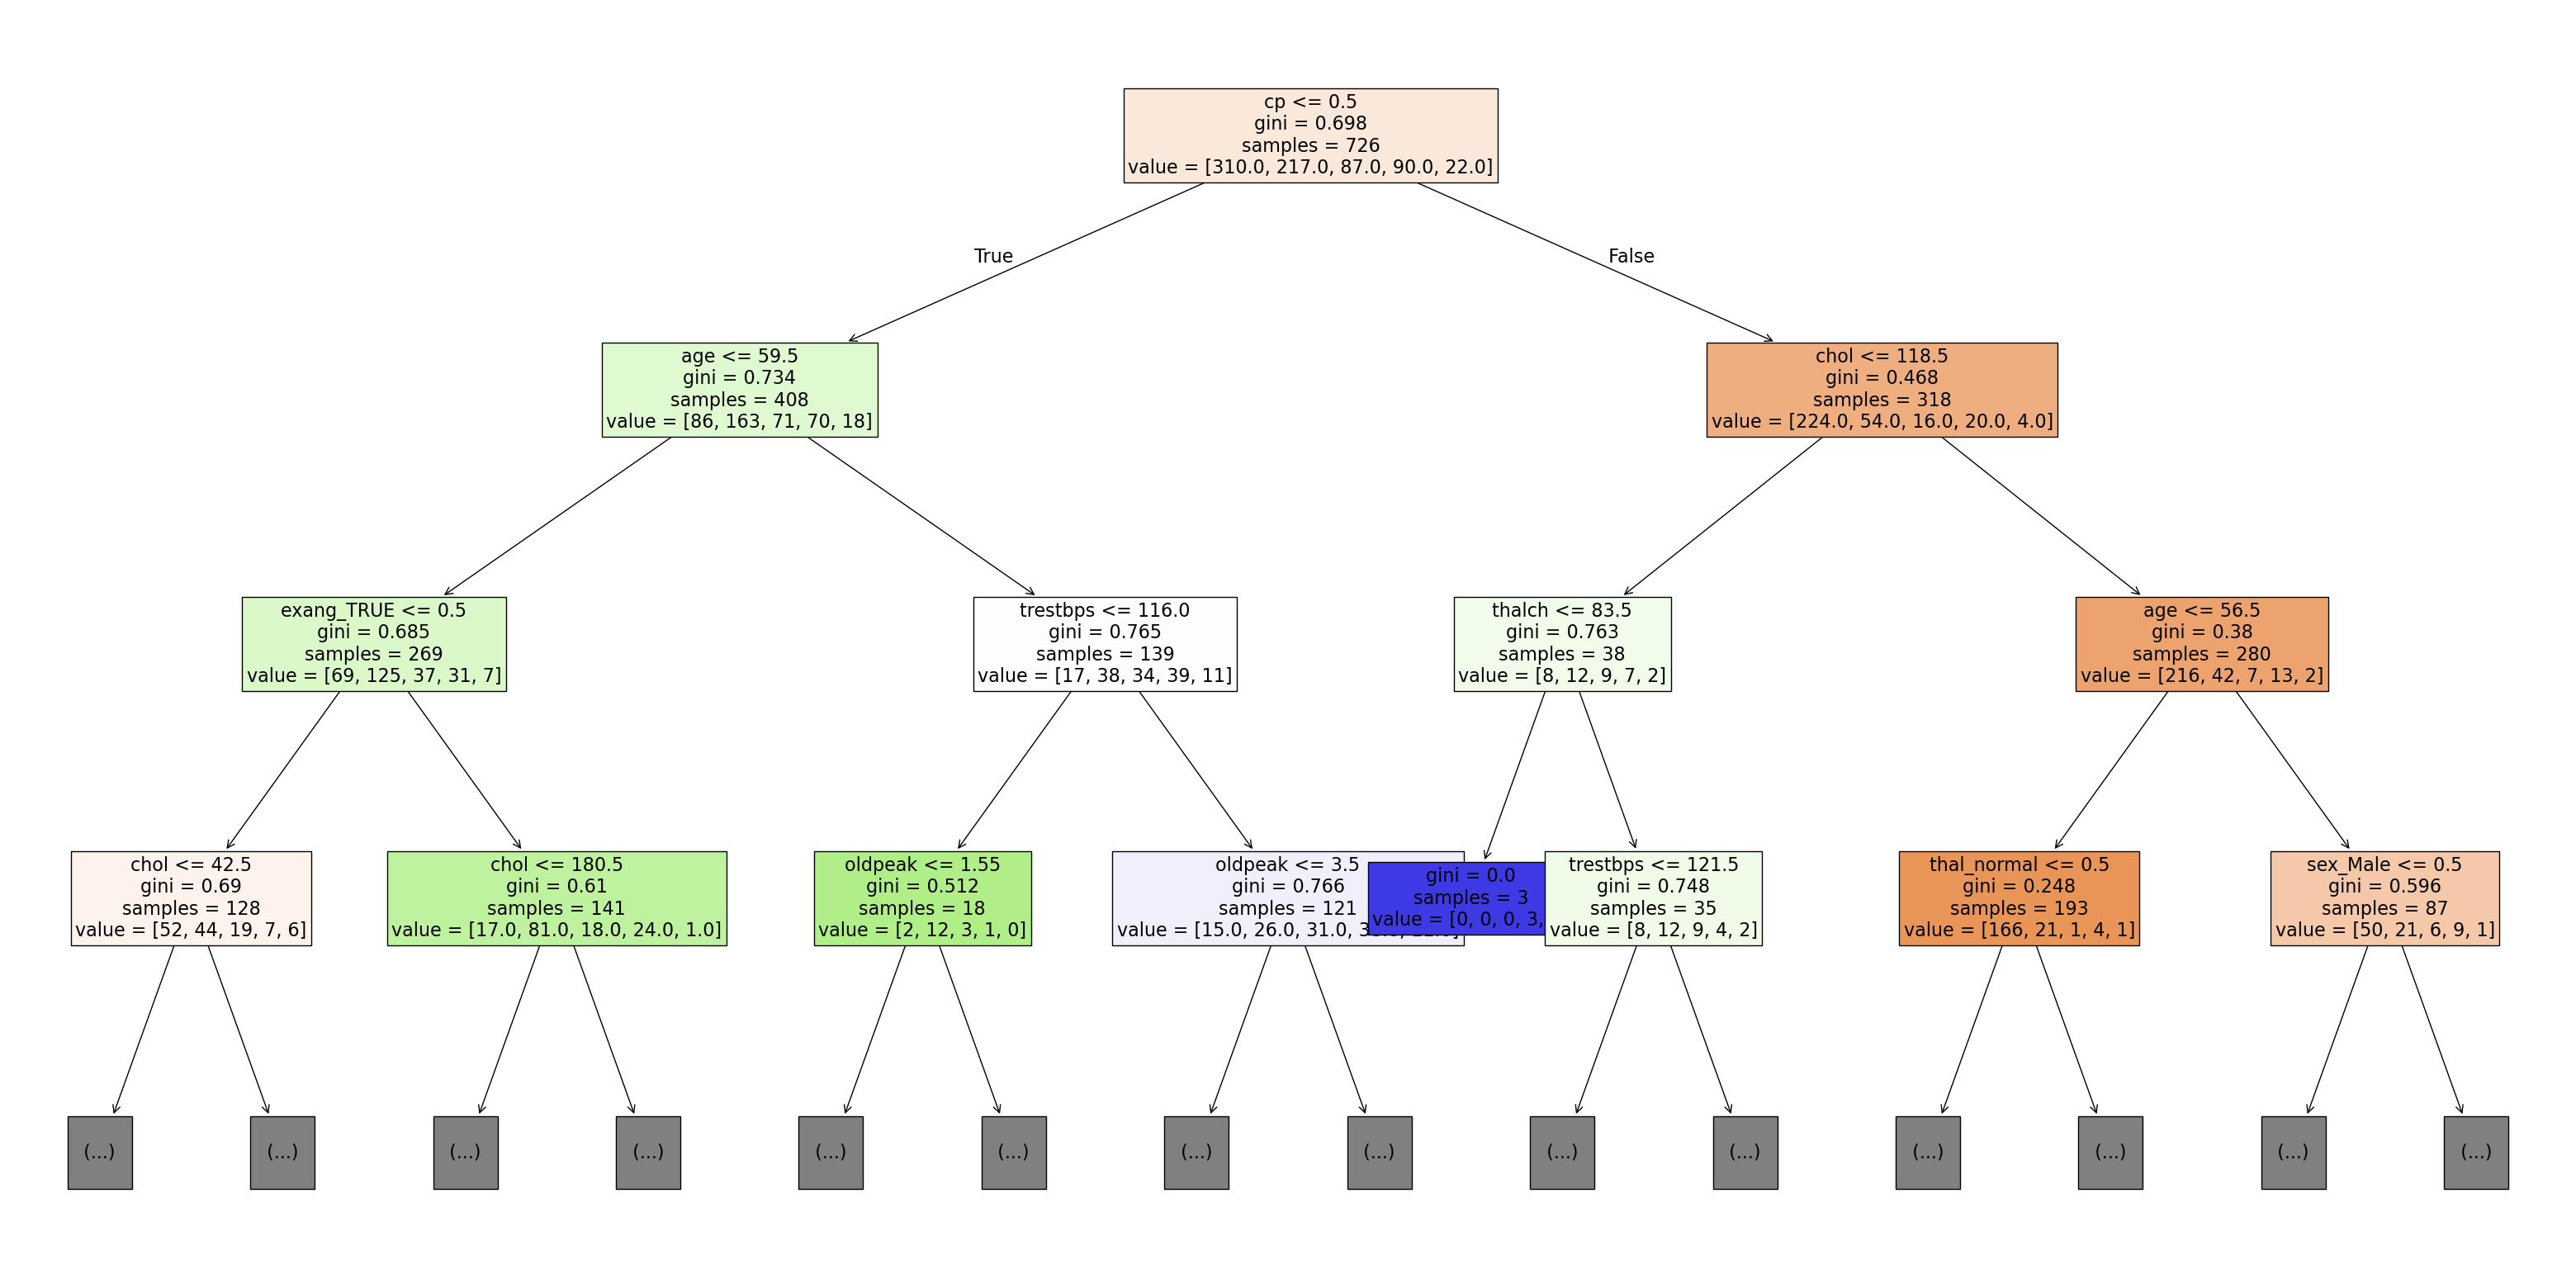

In [214]:
plt.figure(figsize=(40, 20)) 
plot_tree(dt_model,filled=True, feature_names=x.columns,fontsize=16,max_depth=3)
plt.show()

The tree structure helps us understand the Gini impurity, sample size, and class prediction.

Due to the large size of the tree, deeper nodes become difficult to interpret, so used max_depth while plotting.

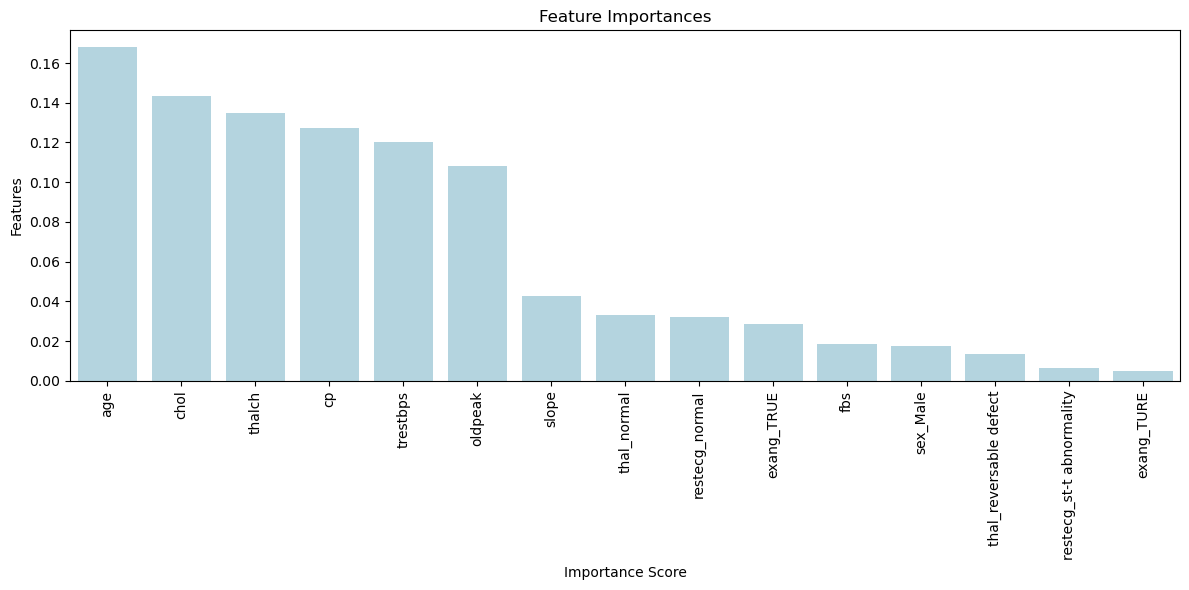

In [277]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Get feature importances
feature_importances = pd.Series(dt_model.feature_importances_, index=x_train.columns)

#Sort values
feature_importances = feature_importances.sort_values(ascending=False)

#Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.index, y=feature_importances.values, color="lightblue")
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The feature importance graph indicates that age is the most important feature in predicting heart disease, followed closely by chol , thalach , and cp.

These features contribute most to the models decision making process..

Interview Questions:

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Some important hyperparameters of decision tree models include:

- max_depth: It sets the maximum depth of the tree. Limiting it helps prevent overfitting. A deeper tree can capture more complex patterns, but might memorize the training data.

- min_samples_split: It defines the minimum number of samples required to split an internal node. A higher value leads to a simpler tree, reducing overfitting.

- min_samples_leaf: This is the minimum number of samples that should be present in a leaf node. Increasing it ensures that leaves have more data, which also helps reduce overfitting.

- criterion: This determines the function used to evaluate the quality of a split. Common options are “gini” (Gini impurity) and “entropy” (Information gain). Both affect how the tree chooses features to split on.

- max_features: It controls the number of features to consider when looking for the best split. Using fewer features can add randomness and help improve generalization.

- Tuning these hyperparameters is crucial for balancing model complexity and generalization. Without tuning, the model may either underfit (too simple) or overfit (too complex).

2.What is the difference between the Label encoding and One-hot encoding?

- Label Encoding assigns each unique category in a feature a unique integer. For example, if a column has values like Red, Green, Blue, label encoding will convert them to 0, 1, 2.

    Useful when the categorical variable has an ordinal relationship (e.g., Low, Medium, High).

    Can introduce a false sense of order when used on nominal data (e.g., city names, product types), which may mislead the model.


  

- One-Hot Encoding creates a new binary column for each unique category. For example, for the same values Red, Green, Blue, it will create 3 columns.

    Best for nominal data where no order exists between categories.

    Increases dimensionality, especially when there are many unique categories.